# Contents of this notebook: (2025-04-02)
- Project 1: use Timm+fastai to train Multi-class images (PASCAL2007)
- Project 2: Image Regression (BIWI HEAD POSE)
- Resources:
    1. fastai lecture part A notebook # 03-which-image-models-are-best.ipynb introduce the timm library.
    2. fastbook #6_mulcat details

# use Timm+fastai to train Multi-class images

In [33]:
import timm
import pandas as pd

In [175]:
#find the family model
res = timm.list_models('res*')
print(res)

['res2net50_14w_8s', 'res2net50_26w_4s', 'res2net50_26w_6s', 'res2net50_26w_8s', 'res2net50_48w_2s', 'res2net50d', 'res2net101_26w_4s', 'res2net101d', 'res2next50', 'resmlp_12_224', 'resmlp_24_224', 'resmlp_36_224', 'resmlp_big_24_224', 'resnest14d', 'resnest26d', 'resnest50d', 'resnest50d_1s4x24d', 'resnest50d_4s2x40d', 'resnest101e', 'resnest200e', 'resnest269e', 'resnet10t', 'resnet14t', 'resnet18', 'resnet18d', 'resnet26', 'resnet26d', 'resnet26t', 'resnet32ts', 'resnet33ts', 'resnet34', 'resnet34d', 'resnet50', 'resnet50_clip', 'resnet50_clip_gap', 'resnet50_gn', 'resnet50_mlp', 'resnet50c', 'resnet50d', 'resnet50s', 'resnet50t', 'resnet50x4_clip', 'resnet50x4_clip_gap', 'resnet50x16_clip', 'resnet50x16_clip_gap', 'resnet50x64_clip', 'resnet50x64_clip_gap', 'resnet51q', 'resnet61q', 'resnet101', 'resnet101_clip', 'resnet101_clip_gap', 'resnet101c', 'resnet101d', 'resnet101s', 'resnet152', 'resnet152c', 'resnet152d', 'resnet152s', 'resnet200', 'resnet200d', 'resnetaa34d', 'resnetaa

In [ ]:
#create models
model = timm.create_model('resnet50', pretrained=True)
model = timm.create_model('efficientnet_b0', pretrained=True, num_classes=10)

In [ ]:
#view architech
print(model)

#calculate the num of params
num_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {num_params}")

In [ ]:
#timm+fastai
from fastai.vision.all import *
from functools import partial

# ‰æãÂ¶Ç‰ΩøÁî® resnet50 Ê®°Âûã
learn = vision_learner(dls, partial(timm.create_model, 'resnet50', pretrained=True, num_classes=dls.c), metrics=accuracy)
learn.fine_tune(3)

Âú®fastai‰∏≠ÔºåÁõ¥Êé•‰º†ÂÖ•resnet18Êàñresnet50Á°ÆÂÆûËÉΩÂø´ÈÄüÊûÑÂª∫ÂõæÂÉèÂàÜÁ±ªÂô®Ôºå‰ΩÜ**timmÂ∫ì**Âú®‰ª•‰∏ãÂá†ÁßçÊÉÖÂÜµ‰∏ãËÉΩÊõ¥ÊúâÊïàÂú∞ÂèëÊå•‰ΩúÁî®Ôºö

- Êõ¥Â§öÂÖÉÁöÑÊ®°ÂûãÈÄâÊã©
- timmÂ∫ìÊèê‰æõ‰∫ÜÂ§ßÈáèÊúÄÊñ∞ÁöÑ„ÄÅÁä∂ÊÄÅÊúÄÂÖàËøõÁöÑÊ®°ÂûãÔºåÂ¶Ç<b>EfficientNet„ÄÅConvNeXt„ÄÅVision Transformer(ViT)</b>Á≠âÔºåËÄåËøô‰∫õÊ®°ÂûãÂú®fastaiÂÜÖÁΩÆÊ®°Âûã‰∏≠ÂèØËÉΩÊ≤°ÊúâÊàñÈÄâÊã©ËæÉÂ∞ë„ÄÇ
- Â¶ÇÊûú‰Ω†ÊÉ≥Â∞ùËØï‰∏çÂêåÊû∂ÊûÑÔºåÊØîËæÉÂÆÉ‰ª¨Âú®‰Ω†Êï∞ÊçÆÈõÜ‰∏äÁöÑË°®Áé∞ÔºåtimmÊòØ‰∏Ä‰∏™ÂæàÂ•ΩÁöÑËµÑÊ∫ê„ÄÇ
- Êõ¥Â•ΩÁöÑÊÄßËÉΩ/ÊïàÁéáÂπ≥Ë°°
- Êüê‰∫õtimmÊ®°ÂûãÂú®ÂèÇÊï∞Èáè„ÄÅÊé®ÁêÜÈÄüÂ∫¶ÂíåÁ≤æÂ∫¶‰∏äÂèØËÉΩÊØî‰º†ÁªüÁöÑResNetÁ≥ªÂàóÊõ¥‰ºò„ÄÇ
- Âú®ÈúÄË¶ÅÈ´òÊïàÊé®ÁêÜÊàñÂØπÊ®°ÂûãÂ§ßÂ∞èÊúâÈôêÂà∂ÁöÑÂú∫ÊôØ‰∏ãÔºà‰æãÂ¶ÇÁßªÂä®ËÆæÂ§áÈÉ®ÁΩ≤ÔºâÔºåÂèØ‰ª•ÈÄâÊã©timm‰∏≠ËΩªÈáèÂåñÁöÑÊ®°Âûã„ÄÇ
- ÁÅµÊ¥ªÁöÑÈ¢ÑËÆ≠ÁªÉÊùÉÈáç
- timmÂ∫ìÊèê‰æõ‰∫ÜÂ§ßÈáèÂú®ImageNet‰∏äÈ¢ÑËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãÔºåËøô‰∫õÈ¢ÑËÆ≠ÁªÉÊùÉÈáçÁªèËøá‰∫ÜÂ§ßÈáèÂÆûÈ™åË∞É‰ºòÔºåÈÄöÂ∏∏ËÉΩ‰∏∫ËøÅÁßªÂ≠¶‰π†Êèê‰æõÊõ¥Â•ΩÁöÑËµ∑ÁÇπ„ÄÇ
- Êõ¥È´òÁöÑÂÆöÂà∂ÂåñÂíåÂÆûÈ™åËá™Áî±Â∫¶
- timmÊèê‰æõ‰∫ÜÁªü‰∏ÄÁöÑÊé•Âè£Êù•ÂàõÂª∫Ê®°ÂûãÔºåÊñπ‰æø‰Ω†Âú®‰∏çÂêåÊû∂ÊûÑ‰πãÈó¥ÂàáÊç¢Ôºå‰∏çÈúÄË¶Å‰øÆÊîπÂ§™Â§ö‰ª£Á†Å„ÄÇ
- Â¶ÇÊûú‰Ω†ÈúÄË¶ÅÂØπÊ®°ÂûãËøõË°åËøõ‰∏ÄÊ≠•‰øÆÊîπ„ÄÅÊ∑ªÂä†Ëá™ÂÆö‰πâÂ±ÇÊàñË∞ÉÊï¥Ê®°ÂûãÁªìÊûÑÔºåtimmÁöÑÊ®°ÂûãÂæÄÂæÄËÆæËÆ°ÂæóËæÉ‰∏∫ÁÅµÊ¥ªÔºå‰æø‰∫éËá™ÂÆö‰πâ„ÄÇ


**ÊÄªÁªìÔºö**
ÂΩì‰Ω†Â∏åÊúõÊé¢Á¥¢Êõ¥Â§öÊñ∞È¢ñÁöÑÊû∂ÊûÑ„ÄÅËøΩÊ±ÇÊõ¥È´òÊÄßËÉΩÊàñÊõ¥È´òÊïàÁöÑÊ®°ÂûãÈÉ®ÁΩ≤Êó∂ÔºåtimmÂ∫ì‰ºöÈùûÂ∏∏ÊúâÁî®ÔºõËÄåÂØπ‰∫éÂø´ÈÄüÊê≠Âª∫ÂíåÈ™åËØÅÂü∫Êú¨ËßÜËßâ‰ªªÂä°ÔºåfastaiÂÜÖÁΩÆÁöÑresnetÁ≥ªÂàóÂ∑≤ÁªèË∂≥Â§ü„ÄÇ‰ΩÜÂú®ÂÆûÈôÖÈ°πÁõÆ‰∏≠ÔºåÁÅµÊ¥ªÂú∞ÁªìÂêàtimmÂíåfastaiÔºåÂèØ‰ª•ËÆ©‰Ω†Ê†πÊçÆÈúÄÊ±ÇÈÄâÂèñÊúÄ‰Ω≥Ê®°Âûã„ÄÇ

more to check on https://timm.fast.ai/ 

## Dataset - PASCAL 2007

Total 9963 images, containing 24640 annotated objects.

The 20 object classes that have been selected are:

- Person: person
- Animal: bird, cat, cow, dog, horse, sheep
- Vehicle: aeroplane, bicycle, boat, bus, car, motorbike, train
- Indoor: bottle, chair, dining table, potted plant, sofa, tv/monitor

In [32]:
path = untar_data(URLs.PASCAL_2007)

In [35]:
df = pd.read_csv(path/'train.csv')
df.head()

fname        labels  is_valid
0  000005.jpg         chair      True
1  000007.jpg           car      True
2  000009.jpg  horse person      True
3  000012.jpg           car     False
4  000016.jpg       bicycle      True

In [193]:
df.describe()

fname  labels is_valid
count         5011    5011     5011
unique        5011     473        2
top     000005.jpg  person     True
freq             1     408     2510

In [194]:
df_test = pd.read_csv(path/'test.csv')
df_test.describe()

fname  labels
count         4952    4952
unique        4952     409
top     000001.jpg  person
freq             1     455

## dataframe -> DataBlock()

In [39]:
DataBlock??

Init signature:
DataBlock(
    blocks: 'list' = None,
    dl_type: 'TfmdDL' = None,
    getters: 'list' = None,
    n_inp: 'int' = None,
    item_tfms: 'list' = None,
    batch_tfms: 'list' = None,
    *,
    get_items=None,
    splitter=None,
    get_y=None,
    get_x=None,
)
Source:        
@docs
@funcs_kwargs
class DataBlock():
    "Generic container to quickly build `Datasets` and `DataLoaders`."
    get_x=get_items=splitter=get_y = None
    blocks,dl_type = (TransformBlock,TransformBlock),TfmdDL
    _methods = 'get_items splitter get_y get_x'.split()
    _msg = "If you wanted to compose several transforms in your getter don't forget to wrap them in a `Pipeline`."
    def __init__(self, 
        blocks:list=None, # One or more `TransformBlock`s
        dl_type:TfmdDL=None, # Task specific `TfmdDL`, defaults to `block`'s dl_type or`TfmdDL`
        getters:list=None, # Getter functions applied to results of `get_items`
        n_inp:int=None, # Number of inputs
        item_tfms:list

In [40]:
dblock = DataBlock()

In [41]:
dset = dblock.datasets(df)

In [44]:
print(len(dset.train), len(dset.valid))

4009 1002


In [45]:
x,y = dset.train[0]
x,y

(fname       003681.jpg
 labels       sheep dog
 is_valid         False
 Name: 1857, dtype: object,
 fname       003681.jpg
 labels       sheep dog
 is_valid         False
 Name: 1857, dtype: object)

In [ ]:
v,w = dset.valid[0]
v,w

### DataBlock - functions

In [47]:
dblock = DataBlock(get_x = lambda r:r['fname'], get_y = lambda r:r['labels'])

In [53]:
def get_x(r): return r['fname']
def get_y(r): return r['labels']

In [54]:
dblock = DataBlock(get_x=get_x, get_y=get_y)

In [55]:
dset = dblock.datasets(df)
x,y = dset.train[0]
x,y

('004386.jpg', 'car train')

### independent variables to open images
- ImageBlock
- MultiCategoryBlock

In [56]:
def get_x(r): return path/'train'/r['fname']
def get_y(r): return r['labels'].split(' ')
dblock = DataBlock(get_x=get_x, get_y=get_y)
dset = dblock.datasets(df)
x,y = dset.train[0]
x,y

(Path('/Users/applewang/.fastai/data/pascal_2007/train/009496.jpg'),
 ['person'])

In [57]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                  get_x=get_x, get_y=get_y)
dset = dblock.datasets(df)

In [58]:
x,y = dset.train[0]
x,y

(PILImage mode=RGB size=500x375,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
                      0., 0., 0., 0., 0.]))

20 categories

In [59]:
y.shape

torch.Size([20])

find the idx and its category

In [ ]:
idx = torch.where(dset.train[0][1]==1.)[0]

dset.train.vocab[idx]

item_tfms

In [80]:
len(df.index[~df['is_valid']].tolist())

2501

### splitter, item_tfms

In [108]:
def splitter(df): 
    train = df.index[~df['is_valid']].tolist()
    valid = df.index[df['is_valid']].tolist()
    return train, valid


dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                  splitter=splitter, 
                   get_x=get_x, get_y=get_y,
                  item_tfms=Resize(128))

In [109]:
dls = dblock.dataloaders(df, bs=64)

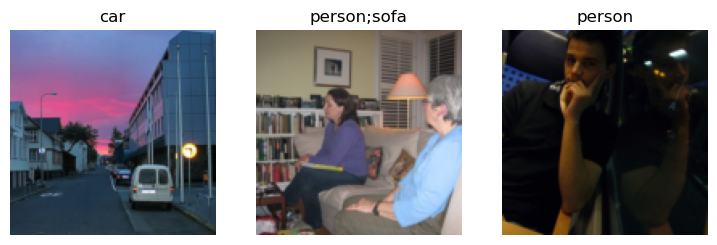

In [110]:
dls.show_batch(max_n=3)

## Model training

In [111]:
learn = vision_learner(dls, resnet18)

In [128]:
x,y = to_cpu(dls.train.one_batch())

In [129]:
actives = learn.model(x)
actives.shape

torch.Size([64, 20])

In [136]:
actives[0].data

TensorImage([ 1.2090,  1.2985, -0.4592,  1.1484,  1.4511, -0.6397,  1.6522,
             -0.1231,  0.7296,  1.6606, -0.7391, -1.8459,  2.1601,  1.8986,
             -0.3020, -1.3157, -1.9643, -1.8666,  0.4742,  0.8925])

In [131]:
y[0]

TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
                     0., 0., 0., 0., 0.])

### Losses & Metrics
**Loss functions ÊçüÂ§±ÂáΩÊï∞** Ôºà‰ºòÂåñÁõÆÊ†áÔºâ
- Ëá™ÂÆö‰πâBinary cross-entropy --‰ª£Á†ÅÁÆÄÊ¥Å„ÄÇ‰∏çË∂≥ÔºöÊï∞ÂÄºÁ®≥ÂÆöÊÄßÂèØËÉΩ‰∏çÂ¶ÇÁªèËøá‰ºòÂåñÁöÑÂÜÖÁΩÆÂáΩÊï∞
- nn.BCEloss() -- ÈúÄÊâãÂä®inputsÂøÖÈ°ªÁªèËøásigmoidÔºàÔºâËΩ¨Êç¢ÊàêÔºà0Ôºå1ÔºâËåÉÂõ¥ÂÜÖÁöÑÊ¶ÇÁéá
- nn.BCEWithLogitsLoss() Êé®Ëçêüëç-- Êï∞ÂÄºÁ®≥ÂÆöÊÄßÂ•ΩÔºöÂÜÖÈÉ®‰ΩøÁî®‰∫Ü log-sum-exp Á≠âÊäÄÂ∑ßÔºåÈÅøÂÖçÁõ¥Êé•ËÆ°ÁÆó log(0) ÁöÑÈóÆÈ¢ò„ÄÇ‰ª£Á†ÅÊõ¥ÁÆÄÊ¥Å„ÄÇ
  - üëçÂú®ËøôÈáåÁöÑvision_learner()‰∏çÈúÄ‰º†ÂÖ•lossËÆæÂÆö„ÄÇÂõ†‰∏∫Âú®*MultiCategoryBlock* (DataBlock)‰∏≠ÈªòËÆ§lossËÆæÂÆö‰∏∫Á¨¶Âêàmulti-labelÁöÑBCEWithLogitsLossFlat„ÄÇ


**Metrics Ë°°ÈáèÊåáÊ†á** ÔºàÂáÜÁ°ÆÁéáÊåáÊ†áÔºâ
- accuracy_multi() -- ÈíàÂØπmulti-labelsÁöÑÂáÜÁ°ÆÁéáËØÑ‰º∞ÔºåÂèØ‰ª•Ë∞ÉÊéßÊòØÂê¶ÈúÄË¶ÅsigmoidÔºåÂíåthreshÈòàÂÄº

In [132]:
def binary_cross_entropy(inputs, targets):
    inputs = inputs.sigmoid()
    return -torch.where(targets==1, inputs, 1-inputs).log().mean()

In [ ]:
loss_func=nn.BCEWithLogitsLoss()
loss = loss_func(actives[0], y[0]) #not working

In [145]:
accuracy_multi?? #metricss

Signature: accuracy_multi(inp, targ, thresh=0.5, sigmoid=True)
Source:   
def accuracy_multi(inp, targ, thresh=0.5, sigmoid=True):
    "Compute accuracy when `inp` and `targ` are the same size."
    inp,targ = flatten_check(inp,targ)
    if sigmoid: inp = inp.sigmoid()
    return ((inp>thresh)==targ.bool()).float().mean()
File:      ~/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/metrics.py
Type:      function

### resnet50

In [148]:
learn = vision_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.2))

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /Users/applewang/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 97.8M/97.8M [00:11<00:00, 8.75MB/s]


SuggestedLRs(valley=0.0020892962347716093)

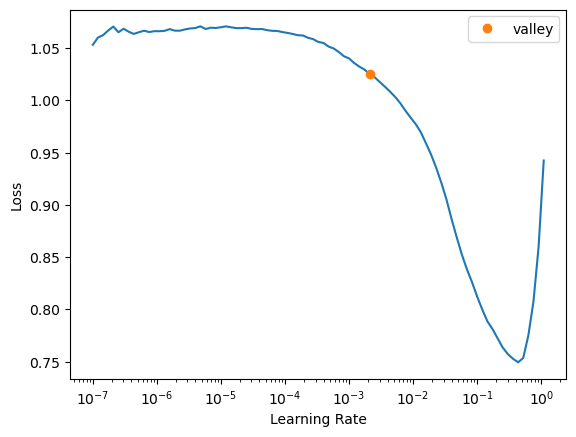

In [149]:
learn.lr_find()

In [150]:
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

In [151]:
learn.metrics = partial(accuracy_multi, thresh=0.1)
learn.validate()

(#2) [0.09940355271100998,0.9422706365585327]

In [152]:
learn.metrics = partial(accuracy_multi, thresh=0.9)
learn.validate()

(#2) [0.09940355271100998,0.9589842557907104]

### predictions
of validation dataset

In [153]:
preds, targets = learn.get_preds()

In [155]:
accuracy_multi(preds, targets, thresh=0.8, sigmoid=False)

TensorBase(0.9634)

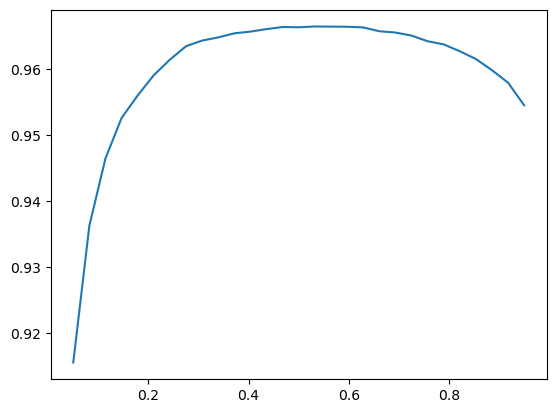

In [158]:
xs =torch.linspace(0.05, 0.95, 29)
accs = [accuracy_multi(preds, targets, thresh=i, sigmoid=False) for i in xs]
plt.plot(xs, accs);

From this plot, thresh=0.5, accuracy (multi) is greater 0.96+

## Timm+Fastai to train

In [167]:
dls.c

20

### resnet 50 vs. resnetv2_50

- ResNet50Ôºö (‚≠êÔ∏èacc 0.9589)
  
‰ºòÁÇπÔºö

	‚Ä¢	ÁªìÊûÑÁÆÄÂçï„ÄÅÂπøÊ≥õ‰ΩøÁî®ÔºåÁ§æÂå∫ÊîØÊåÅÂ•Ω„ÄÇ
	‚Ä¢	È¢ÑËÆ≠ÁªÉÊùÉÈáçÊàêÁÜüÔºåÂú®ËÆ∏Â§ö‰ªªÂä°‰∏äË°®Áé∞Á®≥ÂÆö„ÄÇ
	‚Ä¢	Áº∫ÁÇπÔºö
	‚Ä¢	ÂêéÊøÄÊ¥ªËÆæËÆ°Âú®Ê∑±Â±ÇÁΩëÁªú‰∏≠Ê¢ØÂ∫¶‰º†Êí≠ÂèØËÉΩ‰∏çÂ¶ÇÈ¢ÑÊøÄÊ¥ªÁªìÊûÑÈ´òÊïàÔºåËÆ≠ÁªÉËøáÁ®ã‰∏≠ÂèØËÉΩÂ≠òÂú®‰∏ÄÂÆöÁöÑÈöæÂ∫¶„ÄÇ

- ResNetV2_50Ôºö (acc 0.9538)


‰ºòÁÇπÔºö

	‚Ä¢	È¢ÑÊøÄÊ¥ªËÆæËÆ°‰ΩøÂæóÊ¢ØÂ∫¶‰º†ÈÄíÊõ¥Âπ≥ÊªëÔºåÂ∞§ÂÖ∂Âú®ÈùûÂ∏∏Ê∑±ÁöÑÁΩëÁªú‰∏≠ËÉΩÊõ¥Â•ΩÂú∞ËÆ≠ÁªÉ„ÄÇ
	‚Ä¢	Âú®Êüê‰∫õ‰ªªÂä°‰∏äÂèØËÉΩËé∑ÂæóÊõ¥È´òÁöÑÂáÜÁ°ÆÁéáÂíåÊõ¥Â•ΩÁöÑÊ≥õÂåñÊÄßËÉΩ„ÄÇ
	‚Ä¢	Áº∫ÁÇπÔºö
	‚Ä¢	ÁªìÊûÑ‰∏äËæÉ ResNet50 Áï•ÂæÆÂ§çÊùÇÔºåÈÉ®ÂàÜÈ¢ÑËÆ≠ÁªÉÊ®°ÂûãÂèØËÉΩÊõ¥Êñ∞‰∏çÂ¶Ç ResNet50 ‰∏∞ÂØåÔºàÂèñÂÜ≥‰∫éÂÖ∑‰ΩìÂÆûÁé∞ÂíåÊ°ÜÊû∂ÊîØÊåÅÔºâ„ÄÇ

In [176]:
learn = vision_learner(dls, 
                       partial(timm.create_model, 'resnetv2_50', pretrained=True, num_classes=dls.c),
                       metrics= partial(accuracy_multi, thresh=0.5))

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

In [177]:
learn.fine_tune(3, 2e-3, freeze_epochs=3)

In [178]:
p, t = learn.get_preds()

In [179]:
accuracy_multi(p, t, thresh=0.5, sigmoid=False)

TensorBase(0.9539)

### use efficientnet_b3

üòÖ acc 0.9438

In [190]:
timm.list_models("efficientnet*")

['efficientnet_b0',
 'efficientnet_b0_g8_gn',
 'efficientnet_b0_g16_evos',
 'efficientnet_b0_gn',
 'efficientnet_b1',
 'efficientnet_b1_pruned',
 'efficientnet_b2',
 'efficientnet_b2_pruned',
 'efficientnet_b3',
 'efficientnet_b3_g8_gn',
 'efficientnet_b3_gn',
 'efficientnet_b3_pruned',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_b8',
 'efficientnet_blur_b0',
 'efficientnet_cc_b0_4e',
 'efficientnet_cc_b0_8e',
 'efficientnet_cc_b1_8e',
 'efficientnet_el',
 'efficientnet_el_pruned',
 'efficientnet_em',
 'efficientnet_es',
 'efficientnet_es_pruned',
 'efficientnet_h_b5',
 'efficientnet_l2',
 'efficientnet_lite0',
 'efficientnet_lite1',
 'efficientnet_lite2',
 'efficientnet_lite3',
 'efficientnet_lite4',
 'efficientnet_x_b3',
 'efficientnet_x_b5',
 'efficientnetv2_l',
 'efficientnetv2_m',
 'efficientnetv2_rw_m',
 'efficientnetv2_rw_s',
 'efficientnetv2_rw_t',
 'efficientnetv2_s',
 'efficientnetv2_xl']

In [191]:
learn = vision_learner(dls, 
                       partial(timm.create_model, 'efficientnet_b3', pretrained=True, num_classes=dls.c),
                       metrics= partial(accuracy_multi, thresh=0.5))
learn.fine_tune(3, 2e-3, freeze_epochs=3)

model.safetensors:   0%|          | 0.00/49.3M [00:00<?, ?B/s]

# Image Regression

It's easy to think of deep learning models as being classified into domains, like *computer vision*, *NLP*, and so forth. And indeed, that's how fastai classifies its applications‚Äîlargely because that's how most people are used to thinking of things.

But really, that's hiding a more interesting and deeper perspective. A model is defined by its independent and dependent variables, along with its loss function. That means that there's really a far wider array of models than just the simple domain-based split. Perhaps we have an independent variable that's an image, and a dependent that's text (e.g., generating a caption from an image); or perhaps we have an independent variable that's text and dependent that's an image (e.g., generating an image from a caption‚Äîwhich is actually possible for deep learning to do!); or perhaps we've got images, texts, and tabular data as independent variables, and we're trying to predict product purchases... the possibilities really are endless.

To be able to move beyond fixed applications, to crafting your own novel solutions to novel problems, it helps to really understand the data block API (and maybe also the mid-tier API, which we'll see later in the book). As an example, let's consider the problem of **image regression**. This refers to learning from a dataset where the independent variable is an image, and the dependent variable is one or more floats. Often we see people treat image regression as a whole separate application‚Äîbut as you'll see here, we can treat it as just another CNN on top of the data block API.

We're going to jump straight to a somewhat tricky variant of image regression, because we know you're ready for it! We're going to do a key point model. A **key point** refers to a specific location represented in an image‚Äîin this case, we'll use images of people and we'll be looking for the center of the person's face in each image. That means we'll actually be predicting *two* values for each image: the row and column of the face center. 

## Dataset: BIWI_HEAD_POSE
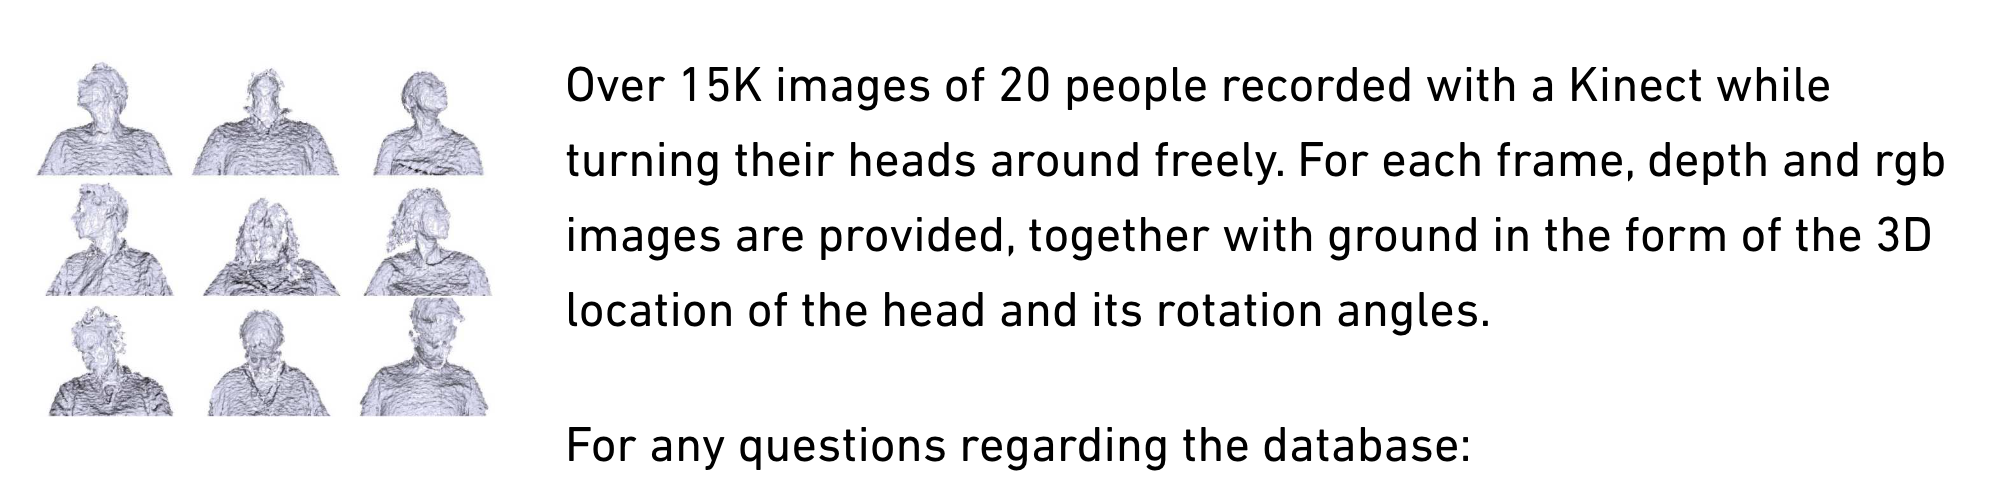

In [214]:
path = untar_data(URLs.BIWI_HEAD_POSE)

Path.BASE_PATH = path 

Âπ∂‰∏çÊòØ pathlib Ëá™Â∏¶ÁâπÊÄßÔºåËÄåÊòØÂú®Êüê‰∏™È°πÁõÆÊàñÁ¨¨‰∏âÊñπÂ∫ì‰∏≠Ëá™ÂÆö‰πâÁöÑÊñπÂºèÔºåÁî®Êù•ÁÆ°ÁêÜ‰∏Ä‰∏™ÂÖ®Â±Ä‚ÄúÂü∫ÂáÜË∑ØÂæÑ‚Äù

In [215]:
Path.BASE_PATH = path

In [216]:
path.ls().sorted()

(#50) [Path('01'),Path('01.obj'),Path('02'),Path('02.obj'),Path('03'),Path('03.obj'),Path('04'),Path('04.obj'),Path('05'),Path('05.obj')...]

In [217]:
(path/'01').ls().sorted()

(#1000) [Path('01/depth.cal'),Path('01/frame_00003_pose.txt'),Path('01/frame_00003_rgb.jpg'),Path('01/frame_00004_pose.txt'),Path('01/frame_00004_rgb.jpg'),Path('01/frame_00005_pose.txt'),Path('01/frame_00005_rgb.jpg'),Path('01/frame_00006_pose.txt'),Path('01/frame_00006_rgb.jpg'),Path('01/frame_00007_pose.txt')...]

Ê≥®ÊÑè‚ö†Ô∏èÔºöÂ≠êÊñá‰ª∂Â§πÔºà‚Äò01‚ÄôÔºâÁöÑÊØè‰∏™frameÈÉΩÊúâÔºö
- pose.txt (pose fileÔºåÂ§¥ÈÉ®ÁöÑÂÉèÁ¥†ÂùêÊ†áÔºàx, yÔºâ‰ª•ÂèäÊ∑±Â∫¶ÂÄºÔºàzÔºâÔºâÂâç3Ë°åÊòØÊ≥®Èáä
- rgb.jpg (image file)
- depth.cal (ËÆ∞ÂΩïÊ∑±Â∫¶Áõ∏Êú∫ÁöÑÂ§ñÂèÇÁü©ÈòµÔºåÁî®‰∫éÂ∞ÜÊ∑±Â∫¶ÂõæÊò†Â∞ÑÂà∞‰∏ñÁïåÂùêÊ†áÊàñ‰∏é RGB ÂØπÈΩê„ÄÇ)
- rgb.cal(ËÆ∞ÂΩïÂΩ©Ëâ≤Áõ∏Êú∫ÁöÑÂÜÖÂèÇÁü©Èòµ--ÂÜÖÂèÇÁü©ÈòµÊòØÁõ∏Êú∫ÁöÑÂÜÖÈÉ®ÂèÇÊï∞ÔºåÂåÖÂê´‰∫ÜÁÑ¶Ë∑ù„ÄÅ‰∏ªÁÇπÁ≠â‰ø°ÊÅØÔºåÈÄöÂ∏∏ÊòØ‰∏Ä‰∏™ 3x3 ÁöÑÁü©Èòµ„ÄÇ) Âêé6Ë°åÊòØÊ≥®Èáä

## how to get the pose file?
- xxxx_pose.txt is the target.

1. get the img file first eg. *Path('03/frame_00393_rgb.jpg')*
2. define a function: get the name (prefix) *03/frame_00393_* , then add the pose file (postfix) *pose.txt* 
3. get the pose file: *Path('03/frame_00393_pose.txt')*

In [218]:
get_image_files??

Signature: get_image_files(path, recurse=True, folders=None)
Source:   
def get_image_files(path, recurse=True, folders=None):
    "Get image files in `path` recursively, only in `folders`, if specified."
    return get_files(path, extensions=image_extensions, recurse=recurse, folders=folders)
File:      ~/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/data/transforms.py
Type:      function

In [257]:
imgs = get_image_files(path) #get the images

In [258]:
imgs[0]

Path('03/frame_00393_rgb.jpg')

In [259]:
str(imgs[0])[:-7]

'/Users/applewang/.fastai/data/biwi_head_pose/03/frame_00393_'

In [263]:
def img2pose(x): return Path(f'{str(x)[:-7]}pose.txt')

In [264]:
img2pose(imgs[0])

Path('03/frame_00393_pose.txt')

In [229]:
PILImage??

Init signature: PILImage() -> 'None'
Source:        
class PILImage(PILBase): 
    "A RGB Pillow `Image` that can show itself and converts to `TensorImage`"
    pass
File:           ~/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/vision/core.py
Type:           BypassNewMeta
Subclasses:     PILImageBW

## show an image

In [236]:
im1 = PILImage.create(imgs[0])
im1.shape

(480, 640)

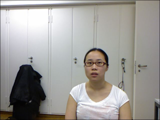

In [237]:
im1.to_thumb(160) #Áº©Áï•Âõæ to_thumb(size)

## transform to tensor - y label
- _pose.txt: x,y,z ÔºàÂÉèÁ¥†ÂùêÊ†áÔºåÊ∑±Â∫¶Ôºâ
- rgb.cal Ôºà3x3ÁöÑÂÜÖÂèÇÁü©ÈòµÔºâ


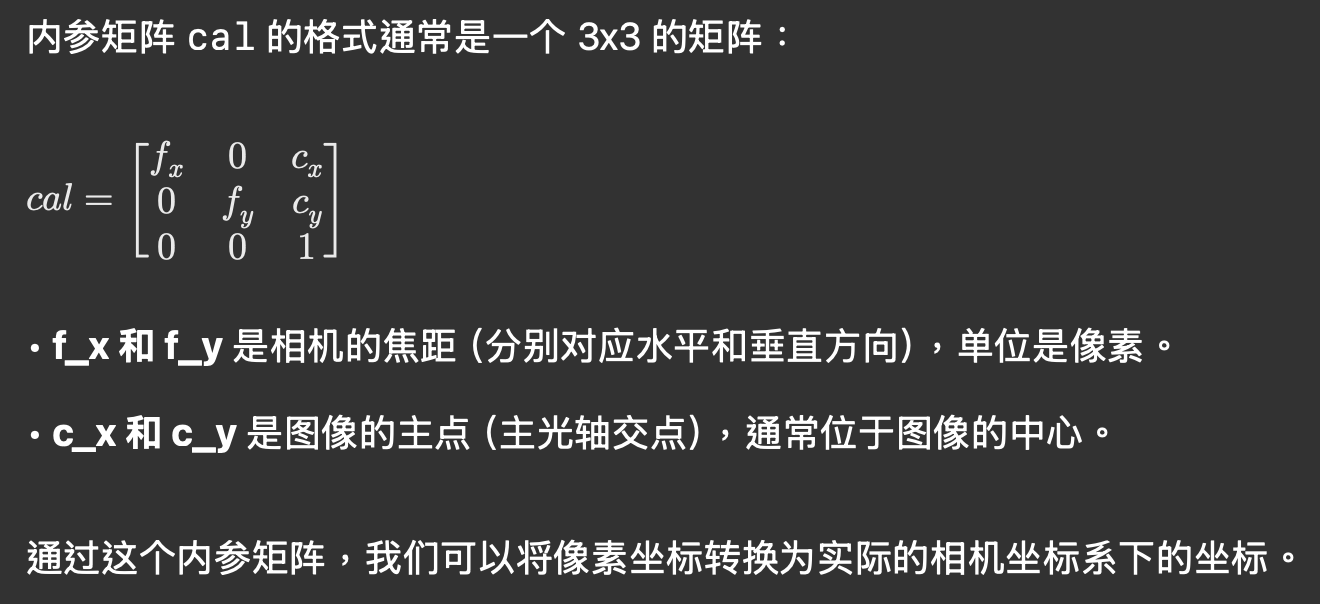
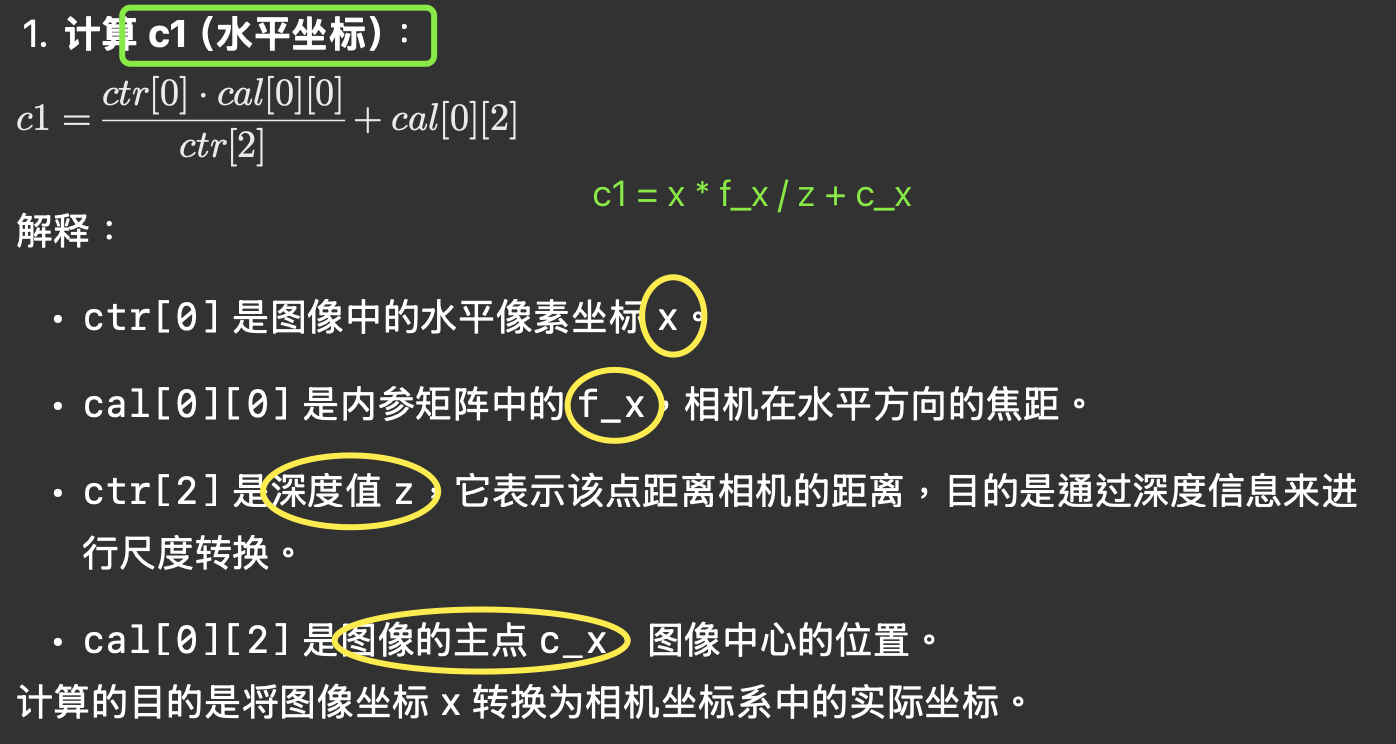 

In [265]:
np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6) #ÈúÄË∑≥ËøáÊúÄÂêé6Ë°åÔºà‰∏çÊòØÊï∞ÊçÆË°åÔºåËÄåÊòØzhu shiÔºâ

array([[517.679,   0.   , 320.   ],
       [  0.   , 517.679, 240.5  ],
       [  0.   ,   0.   ,   1.   ]])

In [266]:
cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6)
#poseÂùêÊ†á & ÂÜÖÂèÇÁü©Èòµ -> ËΩ¨Êç¢ÊàêÁõ∏Êú∫ÁöÑÂÆûÈôÖÂùêÊ†ác1,c2(tensor) -> y label
def get_tensor(f): 
    ctr = np.genfromtxt(img2pose(f), skip_header=3)
    c1 = ctr[0]*cal[0][0]/ctr[2] + cal[0][2]
    c2 = ctr[1]*cal[1][1]/ctr[2] + cal[1][2]
    return tensor([c1, c2])

In [267]:
get_tensor(imgs[0])

tensor([387.1024, 261.9126])

## build a DataBlock()
- resize to half (speed up in training) -> aug_transform(size=(240,320))
- no random splitter (data had 20 people with much frames in 1 folder)
    - pick one person folder totally not in training, but validation.
    - use *FuncSplitter*
- **PointBlock**: its label represents coordinates!

In [ ]:
PointBlock??

In [ ]:
FuncSplitter??

### ‚ö†Ô∏èbatch_tfms = aug_transform() ‰∏çËÉΩÂú®macos‰∏äËøêË°å!
Êç¢Êàêitem_tfms

In [ ]:
biwi  = DataBlock(blocks=(ImageBlock, PointBlock),
                 get_items=get_image_files,
                  get_y=get_tensor,
                 splitter=FuncSplitter(lambda o: o.parent.name=='13'),
                batch_tfms=aug_transforms(size=(240,320)))  #batch_tfms

dls = biwi.dataloaders(path)
dls.show_batch(max_n=9, figsize=(12,9))

In [274]:
biwi  = DataBlock(blocks=(ImageBlock, PointBlock),
                 get_items=get_image_files,
                  get_y=get_tensor,
                 splitter=FuncSplitter(lambda o: o.parent.name=='13'),
                    item_tfms=Resize(240,320)) 

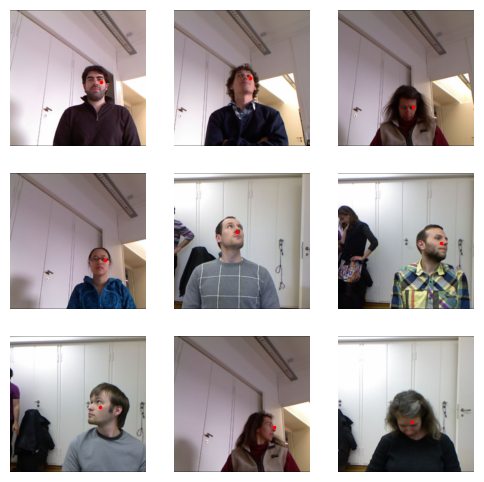

In [277]:
dls = biwi.dataloaders(path)
dls.show_batch(max_n=9, figsize=(6,6))

In [281]:
x,y = dls.one_batch()
x.shape, y.shape

(torch.Size([64, 3, 240, 240]), torch.Size([64, 1, 2]))

In [282]:
y[0]

TensorPoint([[-0.4163,  0.1967]], device='mps:0')

## Train a model
- y_range (coordinates in fastai and PyTorch are always rescaled between -1 and +1)
  

In [283]:
biwi_learner = vision_learner(dls, resnet18, y_range=(-1,1))

SuggestedLRs(valley=0.002511886414140463)

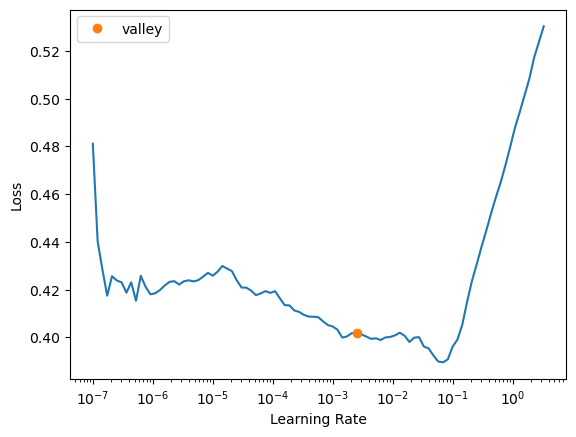

In [284]:
biwi_learner.lr_find()

In [285]:
lr = 0.002
biwi_learner.fine_tune(3, lr)

In [287]:
biwi_learner.loss_func

FlattenedLoss of MSELoss()

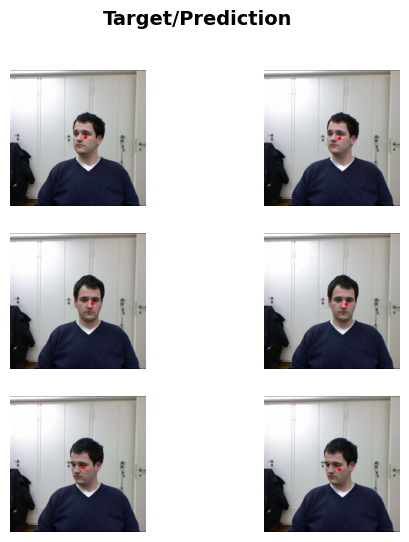

In [289]:
biwi_learner.show_results(ds_idx=1, nrows=3, figsize=(6,6))

## try more?

chatGPT: Â¶ÇÊûú‰Ω†Â∑≤ÁªèÂ∞ùËØïËøáÂú® BIWI Head Pose Êï∞ÊçÆÈõÜ ‰∏äÂ∫îÁî® image regression ÊäÄÊúØÔºåÂπ∂Â∏åÊúõÂ∞ÜËøô‰∏ÄÊñπÊ≥ïÂ∫îÁî®Âà∞ÂÖ∂‰ªñÊï∞ÊçÆÈõÜ‰∏äÔºå‰ª•‰∏ãÊòØ‰∏Ä‰∫õÂÖ∑ÊúâÁõ∏‰ººÁõÆÊ†áÁöÑÊé®ËçêÊï∞ÊçÆÈõÜÔºåÈÄÇÂêàÁî®‰∫éËøõË°åÂõæÂÉèÂõûÂΩí‰ªªÂä°„ÄÇÂÆÉ‰ª¨Ê∂âÂèäÂßøÊÄÅ‰º∞ËÆ°„ÄÅÊ∑±Â∫¶‰º∞ËÆ°„ÄÅÈù¢ÈÉ®ÂÖ≥ÈîÆÁÇπÂõûÂΩíÁ≠â‰ªªÂä°ÔºåÈÉΩÂèØ‰ª•‰ΩøÁî®Á±ª‰ººÁöÑÂõûÂΩíÊñπÊ≥ïËøõË°åËÆ≠ÁªÉ„ÄÇ

‚∏ª

1. AFLW (Annotated Facial Landmarks in the Wild)

    - ‰ªªÂä°ÔºöÈù¢ÈÉ®ÂÖ≥ÈîÆÁÇπÂõûÂΩíÔºàFacial Landmark DetectionÔºâ„ÄÇ
    - Êï∞ÊçÆÈõÜÊ¶ÇËø∞ÔºöAFLW ÊòØ‰∏Ä‰∏™Â§ßËßÑÊ®°ÁöÑÈù¢ÈÉ®ÂõæÂÉèÊï∞ÊçÆÈõÜÔºåÂåÖÂê´ 21,000 Â§öÂº†Èù¢ÈÉ®ÂõæÂÉèÔºåÊ†áÊ≥®‰∫Ü 19 ‰∏™ÂÖ≥ÈîÆÁÇπ„ÄÇËøô‰∏™Êï∞ÊçÆÈõÜÂπøÊ≥õÁî®‰∫éÈù¢ÈÉ®ÂÖ≥ÈîÆÁÇπÊ£ÄÊµãÂíåÈù¢ÈÉ®ÂßøÊÄÅ‰º∞ËÆ°„ÄÇ
	- ÂõûÂΩí‰ªªÂä°Ôºö‰Ω†ÂèØ‰ª•‰ΩøÁî®ÂõæÂÉèÂõûÂΩíÊù•È¢ÑÊµãÂõæÂÉè‰∏≠ÂêÑ‰∏™Èù¢ÈÉ®ÂÖ≥ÈîÆÁÇπÁöÑ 2D ÂùêÊ†áÔºå‰æãÂ¶ÇÈ¢ÑÊµãÂ∑¶Áúº„ÄÅÂè≥Áúº„ÄÅÂò¥Â∑¥Á≠â‰ΩçÁΩÆ„ÄÇ
	- Êé®ËçêÁêÜÁî±Ôºö‰∏é BIWI Êï∞ÊçÆÈõÜÁõ∏‰ººÔºåAFLW Êï∞ÊçÆÈõÜÁöÑÂÖ≥ÈîÆÁÇπÊ£ÄÊµã‰ªªÂä°ÂèØ‰ª•ÈÄöËøáÂõûÂΩíÊñπÊ≥ïÊù•ËøõË°åÔºåÈÄÇÂêà‰Ω†Â∞ùËØïÂõæÂÉèÂõûÂΩíÁöÑÊñπÊ≥ï„ÄÇ


‚∏ª

2. 300W
   
	- ‰ªªÂä°ÔºöÈù¢ÈÉ®ÂÖ≥ÈîÆÁÇπÂõûÂΩíÔºàFacial Landmark DetectionÔºâ„ÄÇ
	- Êï∞ÊçÆÈõÜÊ¶ÇËø∞Ôºö300W ÊòØ‰∏Ä‰∏™ÂåÖÂê´Èù¢ÈÉ®ÂõæÂÉèÂíåÂÖ≥ÈîÆÁÇπÊ†áÊ≥®ÁöÑËæÉÂ§ßÊï∞ÊçÆÈõÜÔºåÂåÖÂê´ 300 Â§öÂº†‰∏çÂêåÂßøÊÄÅ„ÄÅË°®ÊÉÖÂíåÂÖâÁÖßÊù°‰ª∂‰∏ãÁöÑÂõæÂÉè„ÄÇËØ•Êï∞ÊçÆÈõÜÁî®‰∫éÈù¢ÈÉ®ÂÖ≥ÈîÆÁÇπÊ£ÄÊµã‰ªªÂä°„ÄÇ
	- ÂõûÂΩí‰ªªÂä°ÔºöÂêåÊ†∑Ôºå‰Ω†ÂèØ‰ª•ÈÄöËøáÂõûÂΩíÊñπÊ≥ïÈ¢ÑÊµãÈù¢ÈÉ®ÂõæÂÉè‰∏≠ÁöÑ 68 ‰∏™Èù¢ÈÉ®ÂÖ≥ÈîÆÁÇπÁöÑ 2D ÂùêÊ†á„ÄÇ
	- Êé®ËçêÁêÜÁî±Ôºö‰∏é BIWI Êï∞ÊçÆÈõÜÁõ∏‰ººÔºå300W Êèê‰æõ‰∫ÜÈù¢ÈÉ®ÂÖ≥ÈîÆÁÇπÁöÑÊ†áÊ≥®ÔºåÈÄÇÂêàËÆ≠ÁªÉ‰∏Ä‰∏™Âü∫‰∫éÂõæÂÉèÂõûÂΩíÁöÑÊ®°ÂûãÊù•ËøõË°åÈù¢ÈÉ®ÂÆö‰Ωç„ÄÇ

‚∏ª

3. NYU Depth V2
   
	- ‰ªªÂä°ÔºöÊ∑±Â∫¶‰º∞ËÆ°ÔºàDepth EstimationÔºâÂíåÂõæÂÉèÂõûÂΩí„ÄÇ
	- Êï∞ÊçÆÈõÜÊ¶ÇËø∞ÔºöNYU Depth V2 Êï∞ÊçÆÈõÜÂåÖÂê´Ë∂ÖËøá 400,000 Âº† RGB-D ÂõæÂÉèÔºåÊ∂µÁõñÂ§ö‰∏™ÂÆ§ÂÜÖÂú∫ÊôØÔºåÊèê‰æõ‰∫ÜÂΩ©Ëâ≤ÂõæÂÉèÂíåÂØπÂ∫îÁöÑÊ∑±Â∫¶Âõæ„ÄÇ
	- ÂõûÂΩí‰ªªÂä°Ôºö‰Ω†ÂèØ‰ª•‰ΩøÁî®ÂõæÂÉèÂõûÂΩíÊäÄÊúØ‰ªé RGB ÂõæÂÉè‰∏≠È¢ÑÊµãÊ∑±Â∫¶‰ø°ÊÅØÔºåÂç≥ ÊØè‰∏™ÂÉèÁ¥†ÁöÑÊ∑±Â∫¶ÂÄºÔºåÊàñËÄÖËøõË°å Ê∑±Â∫¶ÂõæÁîüÊàêÔºåÂ∞ÜËæìÂÖ•ÂõæÂÉèÊò†Â∞ÑÂà∞‰∏âÁª¥Á©∫Èó¥„ÄÇ
	- Êé®ËçêÁêÜÁî±ÔºöÊ∑±Â∫¶‰º∞ËÆ°‰ªªÂä°ÈÄöÂ∏∏ÊòØÂõæÂÉèÂõûÂΩíÁöÑ‰∏ÄÁßçÂ∫îÁî®Âú∫ÊôØÔºåNYU Depth V2 Êï∞ÊçÆÈõÜÈÄÇÂêàËøõË°åÂõæÂÉèÂõûÂΩíÊù•È¢ÑÊµãÊØè‰∏™ÂÉèÁ¥†ÁöÑÊ∑±Â∫¶„ÄÇ

‚∏ª

4. KITTI
   
	- ‰ªªÂä°ÔºöËá™Âä®È©æÈ©∂„ÄÅÊ∑±Â∫¶‰º∞ËÆ°„ÄÅÁâ©‰ΩìÊ£ÄÊµãÁ≠â„ÄÇ
	- Êï∞ÊçÆÈõÜÊ¶ÇËø∞ÔºöKITTI ÊòØËá™Âä®È©æÈ©∂È¢ÜÂüüÈùûÂ∏∏ËëóÂêçÁöÑÊï∞ÊçÆÈõÜÔºåÂåÖÂê´ RGB ÂõæÂÉè„ÄÅÊ∑±Â∫¶Âõæ„ÄÅÁÇπ‰∫ëÊï∞ÊçÆÁ≠âÔºåÂπøÊ≥õÁî®‰∫éÁâ©‰ΩìÊ£ÄÊµã„ÄÅÊ∑±Â∫¶‰º∞ËÆ°„ÄÅËØ≠‰πâÂàÜÂâ≤Á≠â‰ªªÂä°„ÄÇ
	- ÂõûÂΩí‰ªªÂä°Ôºö‰Ω†ÂèØ‰ª•‰ΩøÁî® KITTI Êï∞ÊçÆÈõÜËøõË°å Ê∑±Â∫¶‰º∞ËÆ°ÂõûÂΩíÔºåÈÄöËøá RGB ÂõæÂÉèÊù•È¢ÑÊµãÊ∑±Â∫¶ÂõæÊàñÁõ∏Êú∫ÁöÑÂßøÊÄÅ„ÄÇ
	- Êé®ËçêÁêÜÁî±ÔºöKITTI Êï∞ÊçÆÈõÜÊèê‰æõ‰∫Ü‰∏∞ÂØåÁöÑÈ©æÈ©∂Âú∫ÊôØÊï∞ÊçÆÔºåÈÄÇÂêàËøõË°åÂü∫‰∫éÂõæÂÉèÂõûÂΩíÁöÑÊ∑±Â∫¶‰º∞ËÆ°‰ªªÂä°Ôºå‰∏é‰Ω†Âú® BIWI Êï∞ÊçÆÈõÜ‰∏≠ÁöÑÊñπÊ≥ïÁ±ª‰ºº„ÄÇ

‚∏ª

5. CelebA

	- ‰ªªÂä°ÔºöÈù¢ÈÉ®Â±ûÊÄßÂõûÂΩíÔºàFacial Attribute RegressionÔºâ„ÄÇ
	- Êï∞ÊçÆÈõÜÊ¶ÇËø∞ÔºöCelebA ÊòØ‰∏Ä‰∏™Â§ßËßÑÊ®°ÁöÑÈù¢ÈÉ®Êï∞ÊçÆÈõÜÔºåÂåÖÂê´Ë∂ÖËøá 200,000 Âº†Èù¢ÈÉ®ÂõæÂÉèÔºåÊ†áÊ≥®‰∫Ü 40 ÁßçÈù¢ÈÉ®Â±ûÊÄßÔºàÂ¶ÇÂæÆÁ¨ë„ÄÅÁúºÈïú„ÄÅËÉ°Â≠êÁ≠âÔºâ„ÄÇÊ≠§Â§ñÔºåËøòÊ†áÊ≥®‰∫Ü 5 ‰∏™ÂÖ≥ÈîÆÁÇπ„ÄÇ
	- ÂõûÂΩí‰ªªÂä°Ôºö‰Ω†ÂèØ‰ª•‰ΩøÁî®ÂõæÂÉèÂõûÂΩíÊñπÊ≥ïÊù•È¢ÑÊµãÈù¢ÈÉ®ÂõæÂÉèÁöÑ Â±ûÊÄßÊ†áÁ≠æÔºåÂ¶ÇÈ¢ÑÊµãÊòØÂê¶‰Ω©Êà¥ÁúºÈïú„ÄÅÊòØÂê¶ÊúâËÉ°Â≠êÁ≠â„ÄÇ
	- Êé®ËçêÁêÜÁî±ÔºöËøô‰∏é BIWI Êï∞ÊçÆÈõÜ‰∏≠ÁöÑÈù¢ÈÉ®ÂßøÊÄÅÂõûÂΩí‰ªªÂä°Á±ª‰ººÔºåÈÄÇÂêàÁî®ÂõûÂΩíÊñπÊ≥ïÊù•È¢ÑÊµãÈù¢ÈÉ®ÂõæÂÉè‰∏≠ÁöÑÁ¶ªÊï£ÊàñËøûÁª≠ÁâπÂæÅ„ÄÇ

‚∏ª

6. DeepFashion
   
	- ‰ªªÂä°ÔºöÊúçË£ÖÂõæÂÉèÁöÑÂ±ûÊÄßÂõûÂΩíÔºàFashion Attribute RegressionÔºâ„ÄÇ
	- Êï∞ÊçÆÈõÜÊ¶ÇËø∞ÔºöDeepFashion Êï∞ÊçÆÈõÜÊòØ‰∏Ä‰∏™Â§ßËßÑÊ®°ÁöÑÊúçË£ÖÊï∞ÊçÆÈõÜÔºåÂåÖÂê´‰∫Ü 80 ‰∏áÂº†ÊúçË£ÖÂõæÂÉèÂíåË∂ÖËøá 50 ‰∏™Á±ªÂà´ÁöÑÊ†áÊ≥®„ÄÇÂÆÉËøòÂåÖÂê´‰∫ÜÂêÑÁßçÂõæÂÉèÂ±ûÊÄßÂíå 2D/3D ÂÖ≥ÈîÆÁÇπ‰ΩçÁΩÆ„ÄÇ
	- ÂõûÂΩí‰ªªÂä°ÔºöÂèØ‰ª•ÈÄöËøáÂõûÂΩíÊñπÊ≥ïÈ¢ÑÊµãÊúçË£ÖÂõæÂÉè‰∏≠ÁöÑ Ë°£ÊúçÈ¢úËâ≤„ÄÅÁßçÁ±ª„ÄÅÂ∞∫ÂØ∏Á≠â ËøûÁª≠Â±ûÊÄß„ÄÇ
	- Êé®ËçêÁêÜÁî±ÔºöDeepFashion ÊòØ‰∏Ä‰∏™ÂÖ∏ÂûãÁöÑÂõæÂÉèÂ±ûÊÄßÂõûÂΩíÈóÆÈ¢òÊï∞ÊçÆÈõÜÔºåÈÄÇÂêàËøõË°åÂü∫‰∫éÂõæÂÉèÂõûÂΩíÁöÑ‰ªªÂä°Êù•È¢ÑÊµãÂõæÂÉèÁöÑÂ±ûÊÄß„ÄÇ

‚∏ª

7. Multiview Stereo (MVS) Dataset

	- ‰ªªÂä°ÔºöÂ§öËßÜËßíÁ´ã‰ΩìÂõæÂÉèÈáçÂª∫ÔºàMultiview 3D ReconstructionÔºâ„ÄÇ
	- Êï∞ÊçÆÈõÜÊ¶ÇËø∞ÔºöËøô‰∏™Êï∞ÊçÆÈõÜÂåÖÂê´Êù•Ëá™Â§ö‰∏™ËßÜËßíÊãçÊëÑÁöÑÂõæÂÉèÔºåÁî®‰∫é‰ªéÂ§ö‰∏™ËßÜËßíÈáçÂª∫Áâ©‰ΩìÁöÑ‰∏âÁª¥ÂΩ¢Áä∂„ÄÇÊØè‰∏™ËßÜËßíÁöÑÂõæÂÉèÈÉΩÊúâÁõ∏Â∫îÁöÑÊ∑±Â∫¶‰ø°ÊÅØ„ÄÇ
	- ÂõûÂΩí‰ªªÂä°Ôºö‰ªéÂ§ö‰∏™ËßÜËßíÁöÑÂõæÂÉè‰∏≠Ôºå‰ΩøÁî®ÂõæÂÉèÂõûÂΩíÈ¢ÑÊµãÊØè‰∏™ÂÉèÁ¥†ÁöÑÊ∑±Â∫¶‰ø°ÊÅØÔºåÊàñËÄÖËøõË°å 3D ÈáçÂª∫„ÄÇ
	- Êé®ËçêÁêÜÁî±ÔºöÂØπ‰∫é‰ªéÂ§öËßÜËßíÂõæÂÉè‰∏≠È¢ÑÊµãÊ∑±Â∫¶‰ø°ÊÅØÊàñËøõË°å‰∏âÁª¥ÈáçÂª∫ÁöÑ‰ªªÂä°ÔºåMVS Êï∞ÊçÆÈõÜÂèØ‰ª•ÂæàÂ•ΩÁöÑÂ∫îÁî®ÂõæÂÉèÂõûÂΩíÊñπÊ≥ï„ÄÇ

‚∏ª

ÊÄªÁªì

Âü∫‰∫é image regression ÁöÑ‰ªªÂä°ÂèØ‰ª•Â∫îÁî®‰∫éÂ§ö‰∏™È¢ÜÂüüÔºåÁâπÂà´ÊòØÂú®ÂßøÊÄÅ‰º∞ËÆ°„ÄÅÊ∑±Â∫¶‰º∞ËÆ°„ÄÅÈù¢ÈÉ®ÂÖ≥ÈîÆÁÇπÊ£ÄÊµã„ÄÅÁâ©‰ΩìÂÆö‰ΩçÁ≠â‰ªªÂä°‰∏≠„ÄÇÈÄöËøáÂõûÂΩíÊñπÊ≥ï‰ªéÂõæÂÉè‰∏≠È¢ÑÊµãËøûÁª≠ÁöÑÊï∞ÂÄºÊàñÂùêÊ†áÔºåÂèØ‰ª•Âú®Â§ö‰∏™ÂÆûÈôÖÂ∫îÁî®‰∏≠Â∏ÆÂä©Ëß£ÂÜ≥ÈóÆÈ¢ò„ÄÇ‰Ω†ÂèØ‰ª•Â∞ùËØï‰∏äËø∞Êé®ËçêÁöÑÊï∞ÊçÆÈõÜÔºåÊù•Â∫îÁî®‰Ω†Âú® BIWI Êï∞ÊçÆÈõÜ‰∏äÁöÑÊñπÊ≥ïÔºåËøõË°åÊñ∞ÁöÑÂÆûÈ™åÂíåÁ†îÁ©∂„ÄÇ

# fastbook #6_multicat questionnaire

‰ª•‰∏ãÊòØÈíàÂØπ‰Ω†ÊèêÂá∫ÁöÑÂ§ö‰∏™ÈóÆÈ¢òÁöÑËß£Á≠îÔºö

‚∏ª

1. How could multi-label classification improve the usability of the bear classifier?

Â§öÊ†áÁ≠æÂàÜÁ±ªÂèØ‰ª•ÊèêÂçá‚ÄúÁÜäÂàÜÁ±ªÂô®‚ÄùÁöÑÂÆûÁî®ÊÄßÔºåÂõ†‰∏∫ÂÆÉÂÖÅËÆ∏Ê®°ÂûãÂú®ÊØè‰∏™ÂõæÂÉè‰∏≠ÂêåÊó∂ËØÜÂà´Â§ö‰∏™Á±ªÂà´„ÄÇÊØîÂ¶ÇÔºåÈô§‰∫ÜÂà§Êñ≠ÂõæÂÉèÊòØÂê¶ÂåÖÂê´‚ÄúÁÜä‚Äù‰ª•Â§ñÔºåÊ®°ÂûãËøòÂèØ‰ª•ÂêåÊó∂Âà§Êñ≠ÊòØÂê¶ÂåÖÂê´ÂÖ∂‰ªñÂä®Áâ©ÊàñËÄÖÂõæÂÉèÁöÑËÉåÊôØÁ±ªÂà´Ôºà‰æãÂ¶Ç‚ÄúÊ£ÆÊûó‚Äù„ÄÅ‚ÄúËçâÂú∞‚ÄùÁ≠âÔºâ„ÄÇËøôÁßçÊñπÂºèÊõ¥Á¨¶ÂêàÂÆûÈôÖÂú∫ÊôØ‰∏≠ÁöÑÈúÄÊ±ÇÔºåÁâπÂà´ÊòØÂú®Â§çÊùÇÁéØÂ¢É‰∏≠ÔºåÂõæÂÉèÂèØËÉΩÂåÖÂê´Â§ö‰∏™Á±ªÂà´ÁöÑÂØπË±°„ÄÇ

‚∏ª

2. How do we encode the dependent variable in a multi-label classification problem?

Âú®Â§öÊ†áÁ≠æÂàÜÁ±ªÈóÆÈ¢ò‰∏≠Ôºå‰æùËµñÂèòÈáèÔºàÂç≥ÁõÆÊ†áÊ†áÁ≠æÔºâÈÄöÂ∏∏Áî®‰∫åËøõÂà∂ÁºñÁ†ÅÔºàone-hot ÁºñÁ†ÅÁöÑÊâ©Â±ïÔºâË°®Á§∫„ÄÇ‰æãÂ¶ÇÔºåÂØπ‰∫éÊØè‰∏™Ê†áÁ≠æÔºåÈÉΩ‰ΩøÁî®‰∏Ä‰∏™ÂçïÁã¨ÁöÑ‰∫åËøõÂà∂ÂÄºÔºåË°®Á§∫ËØ•Ê†áÁ≠æÊòØÂê¶Â≠òÂú®„ÄÇ‰æãÂ¶ÇÔºåÂ¶ÇÊûúÊúâ 3 ‰∏™Ê†áÁ≠æÔºå‚ÄúÁÜä‚Äù„ÄÅ‚ÄúÁãº‚ÄùÂíå‚ÄúÁãó‚ÄùÔºåÂõæÂÉèÂèØËÉΩÊúâÁÜäÂíåÁãó‰∏§‰∏™Ê†áÁ≠æÔºåÈÇ£‰πàÊ†áÁ≠æÂ∞±‰ºöË¢´ÁºñÁ†Å‰∏∫ [1, 0, 1]ÔºåË°®Á§∫ÁÜäÂíåÁãóÊ†áÁ≠æÊòØÂ≠òÂú®ÁöÑÔºåËÄåÁãºÊ†áÁ≠æ‰∏çÂ≠òÂú®„ÄÇ

‚∏ª

3. How do you access the rows and columns of a DataFrame as if it was a matrix?

Âú® Pandas ‰∏≠ÔºåÊÇ®ÂèØ‰ª•‰ΩøÁî® .values Â±ûÊÄßÂ∞Ü DataFrame ËΩ¨Êç¢‰∏∫‰∏Ä‰∏™ NumPy Êï∞ÁªÑÔºåËøôÊ†∑Â∞±ÂèØ‰ª•ÂÉèÁü©Èòµ‰∏ÄÊ†∑ËÆøÈóÆÊï∞ÊçÆ„ÄÇÈÄöËøáËøôÁßçÊñπÂºèÔºåË°åÂíåÂàóÁöÑÁ¥¢Âºï‰πü‰ºöË¢´ËΩ¨Êç¢‰∏∫Áõ∏Â∫îÁöÑÊï∞Â≠óÁ¥¢Âºï„ÄÇ
```python
df = pd.DataFrame([[1, 2], [3, 4]])
matrix = df.values
print(matrix[0, 1])  # ËÆøÈóÆÁ¨¨‰∏ÄË°åÁ¨¨‰∫åÂàóÁöÑÂÖÉÁ¥†
```

‚∏ª

4. How do you get a column by name from a DataFrame?

Ë¶Å‰ªé DataFrame ‰∏≠ÈÄöËøáÂàóÂêçËé∑ÂèñÊüê‰∏ÄÂàóÔºåÁõ¥Êé•‰ΩøÁî®ÂàóÂêç‰Ωú‰∏∫Á¥¢ÂºïÂç≥ÂèØÔºö
```python
column = df['column_name']
```


‚∏ª

5. What is the difference between a Dataset and DataLoader?
   
	- DatasetÔºöÊòØ‰∏Ä‰∏™Êï∞ÊçÆÈõÜÂêàÁ±ªÔºåÂÆÉË°®Á§∫Êï∞ÊçÆÈõÜÊú¨Ë∫´Ôºà‰æãÂ¶ÇÂõæÂÉèÊï∞ÊçÆ„ÄÅÊñáÊú¨Êï∞ÊçÆÔºâ„ÄÇÂÆÉÈÄöÂ∏∏ÁªßÊâøËá™ torch.utils.data.Dataset Á±ªÔºåÂπ∂ÈúÄË¶ÅÂÆûÁé∞ __len__ Âíå __getitem__ ÊñπÊ≥ïÔºåÁî®‰∫éËé∑ÂèñÊï∞ÊçÆÊ†∑Êú¨„ÄÇ
      
	- DataLoaderÔºöÊòØ‰∏Ä‰∏™Êï∞ÊçÆÂä†ËΩΩÂô®ÔºåÁî®‰∫éÂ∞Ü Dataset ‰∏≠ÁöÑÊï∞ÊçÆÊåâÊâπÊ¨°ÔºàbatchÔºâÂä†ËΩΩÂà∞Ê®°Âûã‰∏≠ÔºåÈÄöÂ∏∏‰ºöÁªìÂêàÂ§öÁ∫øÁ®ãËøõË°åÂπ∂Ë°åÂ§ÑÁêÜÔºå‰ª•ÊèêÈ´òÊï∞ÊçÆÂ§ÑÁêÜÁöÑÊïàÁéá„ÄÇDataLoader ÂèØ‰ª•ËøõË°åÊï∞ÊçÆÁöÑÊâπÈáèÂåñ„ÄÅÊâì‰π±„ÄÅÂπ∂Ë°åÂä†ËΩΩÁ≠âÊìç‰Ωú„ÄÇ

‚∏ª

6. What does a Datasets object normally contain?

‰∏Ä‰∏™ Datasets ÂØπË±°ÈÄöÂ∏∏ÂåÖÂê´Ôºö

	- ËÆ≠ÁªÉÈõÜÔºàtrainÔºâ Âíå È™åËØÅÈõÜÔºàvalidÔºâ Êï∞ÊçÆ„ÄÇ
	- ÊØè‰∏™Êï∞ÊçÆÈõÜÔºàtrain Âíå validÔºâÈÄöÂ∏∏ÂåÖÂê´ËæìÂÖ•ÁâπÂæÅÂíåÁõÆÊ†áÊ†áÁ≠æ„ÄÇ
	- ÂèØËÉΩÂåÖÂê´‰∏Ä‰∫õÂèòÊç¢ÔºàÂ¶ÇÊï∞ÊçÆÂ¢ûÂº∫„ÄÅÊ†áÂáÜÂåñÔºâÂíåËá™ÂÆö‰πâÁöÑÊ†áÁ≠æÁîüÊàêÈÄªËæë„ÄÇ

‚∏ª

7. What does a DataLoaders object normally contain?

‰∏Ä‰∏™ DataLoaders ÂØπË±°ÈÄöÂ∏∏ÂåÖÂê´Ôºö

	- ËÆ≠ÁªÉÊï∞ÊçÆÂä†ËΩΩÂô®Ôºàtrain_dlÔºâ Âíå È™åËØÅÊï∞ÊçÆÂä†ËΩΩÂô®Ôºàvalid_dlÔºâÔºåÂç≥Áî®Êù•Âä†ËΩΩËÆ≠ÁªÉÂíåÈ™åËØÅÊï∞ÊçÆÁöÑ DataLoader ÂØπË±°„ÄÇ
	- batch_size„ÄÅÊï∞ÊçÆÂ¢ûÂº∫ÔºàtransformÔºâ„ÄÅshuffle Á≠âË∂ÖÂèÇÊï∞„ÄÇ

‚∏ª

8. What does lambda do in Python?

lambda ÊòØ‰∏ÄÁßçÂåøÂêçÂáΩÊï∞ÔºåÁî®‰∫éÂÆö‰πâ‰∏Ä‰∏™ÁÆÄÂçïÁöÑÂáΩÊï∞ÔºåÈÄöÂ∏∏Áî®‰∫éÂè™‰ΩøÁî®‰∏ÄÊ¨°ÁöÑÁÆÄÂçïÊìç‰Ωú„ÄÇÂÆÉÁöÑËØ≠Ê≥ïÂ¶Ç‰∏ãÔºö

lambda arguments: expression

‰æãÂ¶ÇÔºö
```python

add = lambda x, y: x + y
print(add(2, 3))  # ËæìÂá∫ 5

```

‚∏ª

9. What are the methods to customize how the independent and dependent variables are created with the data block API?

Âú® Fastai ÁöÑ DataBlock API ‰∏≠ÔºåÂ∏∏Áî®ÁöÑÊñπÊ≥ïÊúâÔºö

	‚Ä¢	get_xÔºöÁî®‰∫é‰ªéÊï∞ÊçÆÈõÜ‰∏≠ÊèêÂèñËæìÂÖ•ÂèòÈáèÔºàÁâπÂæÅÔºâÔºå‰æãÂ¶ÇÂõæÂÉèË∑ØÂæÑ„ÄÇ
	‚Ä¢	get_yÔºöÁî®‰∫é‰ªéÊï∞ÊçÆÈõÜ‰∏≠ÊèêÂèñÁõÆÊ†áÂèòÈáèÔºàÊ†áÁ≠æÔºâÔºå‰æãÂ¶ÇÂõæÂÉèÂØπÂ∫îÁöÑÊ†áÁ≠æ„ÄÇ
	‚Ä¢	splitterÔºöÁî®‰∫éÂàíÂàÜËÆ≠ÁªÉÈõÜÂíåÈ™åËØÅÈõÜÔºà‰æãÂ¶ÇÈÄöËøáÊñá‰ª∂Âêç„ÄÅÈöèÊú∫ÂàíÂàÜÁ≠âÔºâ„ÄÇ
	‚Ä¢	item_tfms Âíå batch_tfmsÔºöÁî®‰∫éÊï∞ÊçÆÂ¢ûÂº∫ÂíåÊâπÊ¨°ËΩ¨Êç¢„ÄÇ

‚∏ª

10. Why is **softmax** not an appropriate output activation function when using a one hot encoded target?

Âú®‰ΩøÁî® one-hot ÁºñÁ†ÅÁöÑÁõÆÊ†áÊó∂Ôºåsoftmax Â∏∏Áî®‰∫éÂ§öÁ±ªÂàÜÁ±ª‰ªªÂä°ÔºåÂõ†‰∏∫ÂÆÉ‰ºöÂ∞ÜËæìÂá∫ËΩ¨Êç¢‰∏∫Ê¶ÇÁéáÂàÜÂ∏É„ÄÇÁÑ∂ËÄåÔºåÂú®Â§öÊ†áÁ≠æÂàÜÁ±ªÈóÆÈ¢ò‰∏≠ÔºåÁõÆÊ†áÂèØËÉΩÂåÖÂê´Â§ö‰∏™Ê†áÁ≠æÔºå‰ΩøÁî® softmax ‰ºö‰ΩøÊØè‰∏™Ê†áÁ≠æ‰πãÈó¥‰∫ßÁîüÁõ∏‰∫íÊéíÊñ•ÁöÑÂÖ≥Á≥ªÔºåËøô‰∏çÈÄÇÂêàÂ§öÊ†áÁ≠æ‰ªªÂä°„ÄÇÂú®Â§öÊ†áÁ≠æÂàÜÁ±ª‰∏≠ÔºåÈÄöÂ∏∏‰ΩøÁî® sigmoid ÊøÄÊ¥ªÂáΩÊï∞Êù•Â§ÑÁêÜÊØè‰∏™Ê†áÁ≠æÁöÑÁã¨Á´ãÊÄß„ÄÇ

‚∏ª

11. Why is **nll_loss** not an appropriate loss function when using a one-hot-encoded target?

nll_lossÔºàË¥üÂØπÊï∞‰ººÁÑ∂ÊçüÂ§±ÔºâÈÄöÂ∏∏Áî®‰∫éÂ§öÂàÜÁ±ªÈóÆÈ¢òÔºåÂπ∂‰∏îÈÖçÂêà softmax ‰ΩøÁî®„ÄÇÁÑ∂ËÄåÔºånll_loss Âú®Â§öÊ†áÁ≠æÈóÆÈ¢ò‰∏≠‰∏çÈÄÇÁî®ÔºåÂõ†‰∏∫ÊØè‰∏™Ê†áÁ≠æÊòØÁã¨Á´ãÁöÑÔºå‰∏îÊúâÂ§ö‰∏™Ê†áÁ≠æÂèØËÉΩÂêåÊó∂Â≠òÂú®ÔºåËÄå nll_loss ÈúÄË¶ÅÁ±ªÂà´‰πãÈó¥‰∫íÊñ•„ÄÇÂõ†Ê≠§ÔºåÈÄÇÁî®‰∫éÂ§öÊ†áÁ≠æÂàÜÁ±ªÁöÑÊçüÂ§±ÂáΩÊï∞ÊòØ BCEWithLogitsLoss„ÄÇ

‚∏ª

12. What is the difference between nn.BCELoss and nn.BCEWithLogitsLoss?
    
	- nn.BCELossÔºöÁî®‰∫é‰∫åÂàÜÁ±ªÈóÆÈ¢òÔºåÂÅáËÆæËæìÂÖ•Â∑≤ÁªèÊòØÈÄöËøá sigmoid ÊøÄÊ¥ªÁöÑÊ¶ÇÁéáÂÄºÔºåËæìÂá∫ÊòØ 0 Âà∞ 1 ‰πãÈó¥ÁöÑÂÄº„ÄÇ
	- nn.BCEWithLogitsLossÔºöÁî®‰∫é‰∫åÂàÜÁ±ªÈóÆÈ¢òÔºå‰∏çÈúÄË¶ÅÊèêÂâç‰ΩøÁî® sigmoid ÊøÄÊ¥ªÔºåÂÆÉÂ∞ÜÂéüÂßãÁöÑÁΩëÁªúËæìÂá∫ÔºàÂç≥ logitsÔºâ‰Ωú‰∏∫ËæìÂÖ•ÔºåÂπ∂Âú®ËÆ°ÁÆóÊçüÂ§±Êó∂Ëá™Âä®ËøõË°å sigmoid ÊøÄÊ¥ª„ÄÇ

‚∏ª

13. Why can‚Äôt we use regular accuracy in a multi-label problem?

Âú®Â§öÊ†áÁ≠æÂàÜÁ±ªÈóÆÈ¢ò‰∏≠ÔºåÊØè‰∏™Ê†∑Êú¨ÂèØËÉΩÊúâÂ§ö‰∏™Ê†áÁ≠æÔºàËÄåÈùû‰∏Ä‰∏™Ê†áÁ≠æÔºâÔºåÂõ†Ê≠§‚ÄúÂ∏∏ËßÑÂáÜÁ°ÆÁéá‚Äù‰∏çËÉΩÂáÜÁ°ÆË°°ÈáèÊ®°ÂûãÁöÑÊÄßËÉΩ„ÄÇÂ∏∏ËßÑÂáÜÁ°ÆÁéáËÆ°ÁÆóÁöÑÊòØÈ¢ÑÊµãÊ†áÁ≠æ‰∏éÁúüÂÆûÊ†áÁ≠æÂÆåÂÖ®‰∏ÄËá¥ÁöÑÊ†∑Êú¨ÊØî‰æãÔºå‰ΩÜÂ§öÊ†áÁ≠æÂàÜÁ±ª‰∏≠ÊØè‰∏™Ê†áÁ≠æÁöÑÁã¨Á´ãÊÄß‰ΩøÂæóËøôÁßçËÆ°ÁÆóÊñπÂºè‰∏çÂêàÈÄÇ„ÄÇÈÄöÂ∏∏‰ΩøÁî® ÂáÜÁ°ÆÁéáÔºàaccuracyÔºâ Êàñ F1 score Êù•Ë°°ÈáèÊØè‰∏™Ê†áÁ≠æÁöÑË°®Áé∞„ÄÇ

‚∏ª

14. When is it okay to tune a hyperparameter on the validation set?

Ë∞ÉÊï¥Ë∂ÖÂèÇÊï∞Êó∂ÔºåÂ∫îËØ•Âú®ËÆ≠ÁªÉÈõÜ‰∏äËÆ≠ÁªÉÔºå‰ΩøÁî®È™åËØÅÈõÜÊù•ÈÄâÊã©ÊúÄÂ•ΩÁöÑË∂ÖÂèÇÊï∞„ÄÇË∂ÖÂèÇÊï∞Ë∞ÉÊï¥‰∏çÂ∫îËØ•Âú®ÊµãËØïÈõÜ‰∏äËøõË°åÔºåÂõ†‰∏∫ÊµãËØïÈõÜÁî®‰∫éÊúÄÁªàËØÑ‰º∞Ê®°ÂûãÊÄßËÉΩÔºåÊµãËØïÈõÜÂ∫îËØ•‰øùÁïô‰Ωú‰∏∫Ê®°ÂûãËØÑ‰º∞ÁöÑÊ†áÂáÜ„ÄÇ

‚∏ª

15. How is y_range implemented in fastai? (See if you can implement it yourself and test it without peeking!)

Âú® Fastai ‰∏≠Ôºåy_range ÊòØÁî®Êù•ÂÆö‰πâÁõÆÊ†áÂèòÈáèÁöÑËåÉÂõ¥Ôºà‰æãÂ¶ÇÔºåÂú®ÂõûÂΩíÈóÆÈ¢ò‰∏≠ÔºâÔºö

	‚Ä¢	ÂÆÉÈÄöÂ∏∏ÈÄöËøá y_range ÂèÇÊï∞‰º†ÈÄíÁªô Learner Êàñ DataBlockÔºåÁî®‰∫éÂØπÁõÆÊ†áËøõË°åÂΩí‰∏ÄÂåñÂ§ÑÁêÜ„ÄÇ

‰æãÂ¶ÇÔºö
```python
learn = cnn_learner(dls, resnet34, y_range=(0, 1))

```

‚∏ª

16. What is a regression problem? What loss function should you use for such a problem?

ÂõûÂΩíÈóÆÈ¢òÊòØÈ¢ÑÊµã‰∏Ä‰∏™ËøûÁª≠ÂèòÈáèÁöÑ‰ªªÂä°ÔºåËÄå‰∏çÊòØÂàÜÁ±ªÈóÆÈ¢ò‰∏≠ÁöÑÁ¶ªÊï£Á±ªÂà´„ÄÇÂ∏∏Áî®ÁöÑÊçüÂ§±ÂáΩÊï∞ÊòØ ÂùáÊñπËØØÂ∑ÆÊçüÂ§±ÔºàMSELossÔºâÔºåÂÆÉËÆ°ÁÆóÈ¢ÑÊµãÂÄº‰∏éÁúüÂÆûÂÄº‰πãÈó¥ÁöÑÂ∑ÆÂºÇÂπ≥Êñπ„ÄÇ

‚∏ª

17. What do you need to do to make sure the fastai library applies the same data augmentation to your input images and your target point coordinates?

Âú® Fastai ‰∏≠ÔºåÂ¶ÇÊûú‰Ω†Â∏åÊúõÂØπËæìÂÖ•ÂõæÂÉèÂíåÁõÆÊ†áÂùêÊ†áÔºà‰æãÂ¶ÇÔºåÂÖ≥ÈîÆÁÇπÔºâÂ∫îÁî®Áõ∏ÂêåÁöÑÊï∞ÊçÆÂ¢ûÂº∫ÔºåÂèØ‰ª•‰ΩøÁî® item_tfms Âíå batch_tfms Êù•ÂØπÊï∞ÊçÆËøõË°åÂ§ÑÁêÜÔºåÂπ∂Á°Æ‰øù‰ΩøÁî®Áõ∏ÂêåÁöÑËΩ¨Êç¢Ôºà‰æãÂ¶ÇÔºåÊóãËΩ¨„ÄÅÁº©ÊîæÁ≠âÔºâ„ÄÇpoint_coord Êàñ keypoint Á±ªÂûãÁöÑÊ†áÁ≠æÂèØ‰ª•‰∏éÂõæÂÉè‰∏ÄËµ∑ËøõË°åÂ¢ûÂº∫Ôºö

```python
transforms = [RandomResizedCrop(), Flip()]
dblock = DataBlock(blocks=(ImageBlock, PointBlock),
                   get_items=get_image_files,
                   item_tfms=transforms)
```